# Importing Packages

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt 
%matplotlib inline

## Q1.Import the cifar10 dataset from ‘keras.datasets’. Perform all the data preprocessing required.

## Importing Dataset


In [2]:
from keras.datasets import cifar10

In [3]:
data=cifar10.load_data()

## Data Partition

In [4]:
(X_train,Y_train),( X_test, Y_test)=data

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

## Normalise the data

In [7]:
X_train=X_train/255
X_test=X_test/255

## Q.2 Build a CNN architecture with Keras and stack an ANN on top of CNN.


## Build a CNN architecture with Keras 

In [8]:
classifier = Sequential()

classifier.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-traina

## stack an ANN on top of CNN.

In [10]:
classifier.add(Dense(units = 512, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 126 NEURONS 
classifier.add(Dense(units = 1, activation = 'sigmoid'))  ## OUTPUT LAYER WITH 1 NUERONS # sigmoid = pro

In [11]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 512)               5

In [13]:
# fit model
history = classifier.fit(X_train, Y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 96s 59ms/step - loss: -106163249152.0000 - accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 102s 65ms/step - loss: -2439823753216.0000 - accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 89s 57ms/step - loss: -12150600892416.0000 - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 87s 56ms/step - loss: -34633764831232.0000 - accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 82s 53ms/step - loss: -75629114425344.0000 - accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 85s 54ms/step - loss: -141304474370048.0000 - accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 83s 53ms/step - loss: -238266330644480.0000 - accuracy: 0.1000
Epoch 8/10
1563/1563 [==============================] - 77s 49ms/step - loss: -374339685842944.0000 - accuracy: 0.1000
Epoch 9/10
1563/1563 [==============================] -

## Q.3 Fit and evaluate the model. Plot the training and validation curves.

### Evaluate the model

In [15]:
score = classifier.evaluate(X_test, Y_test, batch_size=128, verbose=0)
score

[-1636715131305984.0, 0.10000000149011612]

In [16]:
print(classifier.metrics_names)

['loss', 'accuracy']


## Plot the training and validation curves

In [19]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

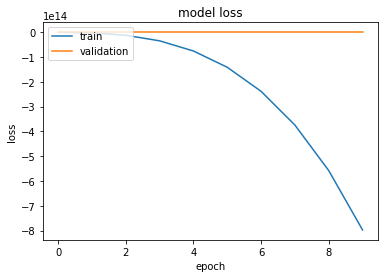

In [20]:
plotLosses(history)